In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
r.seed(256)

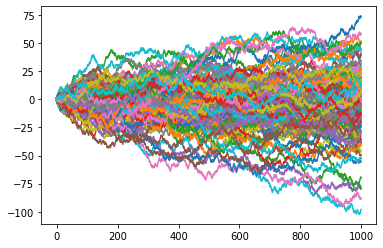

In [4]:
# Random walk

step = lambda : 1 if r.random() < 0.5 else -1
n = 1000
runs = 100

for i in range(runs):
    steps = [step() for i in range(n)]
    walk = np.cumsum(steps) 
    plt.plot(walk)

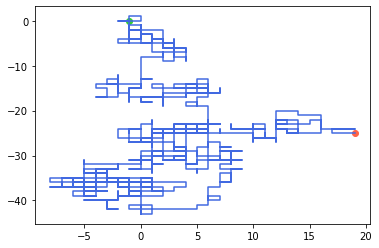

In [5]:
# 2D Random walk

def step_2D():
    z = r.random()
    if z < 0.25:
        return (0,1)
    elif z < 0.5:
        return (0,-1)
    elif z < 0.75:
        return (1,0)
    return (-1,0)

n = 1000
runs = 1
colors = ["royalblue", "gold", "slateblue", "orange", "tomato"]

for i in range(runs):
    steps = [step_2D() for i in range(n)]
    sx = np.cumsum([s[0] for s in steps])
    sy = np.cumsum([s[1] for s in steps])
    plt.plot(sx, sy, color=colors[i])
    plt.scatter(sx[0], sy[0], color="limegreen")
    plt.scatter(sx[-1], sy[-1], color="tomato")

In [ ]:
# Montecarlo

f = lambda x : (1 - x**2)**1.5
a, b = 0, 1
N = np.logspace(2, 8, num=7, base=10, dtype=int)
V = 1 - 0

mean = lambda f, n, a, b : 1/n * sum(f(r.uniform(a, b)) for i in range(n))
mean_sq = lambda f, n, a, b : 1/n * sum(f(r.uniform(a, b))**2 for i in range(n))

def montecarlo(f, n, a, b, v):
    m = mean(f, n, a, b)
    m2 = mean_sq(f, n, a, b)
    return v*m + v*(((m2 - m**2)/n)**0.5)

def timer(f, *args):
    t = time.time()
    r = f(*args)
    print("{:f} seconds".format(time.time() - t))
    return r

for n in N:
    x = timer(montecarlo, f, n, a, b, V)
    print("n = {:.0e}, x = {:.6f}".format(n, x))

In [ ]:
# Ejercicio 4

f = lambda x: np.exp(-x)
sol = lambda x: 0 if x == 0 else 1 if x == np.inf else np.exp(1 - 1/x)
valor_real = sol(1) - sol(0)

N = np.logspace(2, 8, num=7, base=10, dtype=int)
V = 1 - 0

# Cambio variable
fy = lambda y: 1/(y**2) * np.exp(1 - 1/y)
a, b = 0, 1

for n in N:
    x = timer(montecarlo, fy, n, a, b, V)
    print("n = {:.0e}, x = {:.6f}, err = {:.2e}".format(n, x, abs(x - valor_real)))

In [ ]:
# Ejercicio 5

R = 1.5
V = 4 * R**2

f = lambda x, y, R: 0 if x**2 + y**2 > R**2 else 1
valor_real = np.pi * R**2

mean2 = lambda f, n, R: 1/n * sum(f(r.uniform(-R, R), r.uniform(-R, R), R) for i in range(n))

for n in N:
    S = timer(lambda : V*mean2(f, n, R))
    print("n = {:.0e}, x = {:.6f}, err = {:.2e}".format(n, S, abs(S - valor_real)))

In [20]:
# Ejercicio 6

R = 1.5

f = lambda x, y, z, R: 0 if x**2 + y**2 + z**2 > R**2 else 1
valor_real = 4/3 * np.pi * R**3

mean3 = lambda f, n, R: 1/n * sum(f(r.uniform(-R, R), r.uniform(-R, R), r.uniform(-R, R), R) for i in range(n))

for n in N:
    V = timer(lambda : (2*R)**3 * mean3(f, n, R))
    print("n = {:.0e}, V = {:.6f}, err = {:.2e}".format(n, V, abs(V - valor_real)))

0.000193 seconds
n = 1e+02, x = 14.850000, err = 7.13e-01
0.001986 seconds
n = 1e+03, x = 14.229000, err = 9.18e-02
0.020597 seconds
n = 1e+04, x = 14.107500, err = 2.97e-02
0.154542 seconds
n = 1e+05, x = 14.193900, err = 5.67e-02
1.625749 seconds
n = 1e+06, x = 14.137227, err = 6.01e-05
14.728578 seconds
n = 1e+07, x = 14.140021, err = 2.85e-03
138.133981 seconds
n = 1e+08, x = 14.137714, err = 5.47e-04


In [44]:
# Utilizando random de numpy podemos conseguir moito mellor rendimiento a cambio de memoria ram

import sys

R2 = R**2
f = lambda x2: 0 if x2 > R2 else 1

def np_volumen(n):
    xr = np.random.rand(int(n), 3) * 2*R - R
    i = np.count_nonzero(np.sum(xr**2, axis=1) < R2)
    return (2*R)**3 * (i/n), sys.getsizeof(xr)

for n in N:
    V, size = timer(np_volumen, n)
    print("n = {:.0e}, V = {:.6f}, err = {:.2e}, memoria = {:.2f} MB".format(n, V, abs(V - valor_real), size * 1e-6))

0.000387 seconds
n = 1e+02, V = 14.310000, err = 1.73e-01, memoria = 0.00 MB
0.000887 seconds
n = 1e+03, V = 14.256000, err = 1.19e-01, memoria = 0.02 MB
0.003912 seconds
n = 1e+04, V = 13.950900, err = 1.86e-01, memoria = 0.24 MB
0.008684 seconds
n = 1e+05, V = 14.181750, err = 4.46e-02, memoria = 2.40 MB
0.145394 seconds
n = 1e+06, V = 14.131719, err = 5.45e-03, memoria = 24.00 MB
0.867771 seconds
n = 1e+07, V = 14.136949, err = 2.18e-04, memoria = 240.00 MB
12.521974 seconds
n = 1e+08, V = 14.136655, err = 5.12e-04, memoria = 2400.00 MB


In [62]:
# Para solucionar o problema da memoria ram vamos subdividir en bloques

block_size = 2**28 # Bloques de 268 MB de ram
float_size = sys.getsizeof(float(0.0))
block_n = int(block_size / float_size)

def np_volumen(n):
    I = 0
    for i in range(int(np.ceil(n / block_n))):
        size = min(block_n, n - i*block_n)
        xr = np.random.rand(size, 3) * 2*R - R
        I += np.count_nonzero(np.sum(xr**2, axis=1) < R2)
    return (2*R)**3 * (I/n), sys.getsizeof(xr), np.ceil(n / block_n)

N = np.logspace(2, 9, num=8, base=10, dtype=int)

for n in N:
    V, size, bloques = timer(np_volumen, n)
    print("n = {:.0e}, V = {:.6f}, err = {:.2e}, bloques = {:.0f}".format(n, V, abs(V - valor_real), bloques))

0.000169 seconds
n = 1e+02, V = 12.690000, err = 1.45e+00, bloques = 1
0.000560 seconds
n = 1e+03, V = 14.499000, err = 3.62e-01, bloques = 1
0.003485 seconds
n = 1e+04, V = 13.745700, err = 3.91e-01, bloques = 1
0.008722 seconds
n = 1e+05, V = 14.155560, err = 1.84e-02, bloques = 1
0.106610 seconds
n = 1e+06, V = 14.120244, err = 1.69e-02, bloques = 1
0.920747 seconds
n = 1e+07, V = 14.132345, err = 4.82e-03, bloques = 1
8.897460 seconds
n = 1e+08, V = 14.136639, err = 5.27e-04, bloques = 9
89.026110 seconds
n = 1e+09, V = 14.137970, err = 8.03e-04, bloques = 90


In [63]:
block_size = 2**24 # Bloques de 16 MB de ram
float_size = sys.getsizeof(float(0.0))
block_n = int(block_size / float_size)

def np_volumen(n):
    I = 0
    for i in range(int(np.ceil(n / block_n))):
        size = min(block_n, n - i*block_n)
        xr = np.random.rand(size, 3) * 2*R - R
        I += np.count_nonzero(np.sum(xr**2, axis=1) < R2)
    return (2*R)**3 * (I/n), sys.getsizeof(xr), np.ceil(n / block_n)

N = np.logspace(2, 9, num=8, base=10, dtype=int)

for n in N:
    V, size, bloques = timer(np_volumen, n)
    print("n = {:.0e}, V = {:.6f}, err = {:.2e}, bloques = {:.0f}".format(n, V, abs(V - valor_real), bloques))

0.000416 seconds
n = 1e+02, V = 14.850000, err = 7.13e-01, bloques = 1
0.000939 seconds
n = 1e+03, V = 14.391000, err = 2.54e-01, bloques = 1
0.002980 seconds
n = 1e+04, V = 14.164200, err = 2.70e-02, bloques = 1
0.009496 seconds
n = 1e+05, V = 14.131530, err = 5.64e-03, bloques = 1
0.086322 seconds
n = 1e+06, V = 14.157099, err = 1.99e-02, bloques = 2
0.678593 seconds
n = 1e+07, V = 14.130663, err = 6.50e-03, bloques = 15
6.723321 seconds
n = 1e+08, V = 14.135427, err = 1.74e-03, bloques = 144
58.414170 seconds
n = 1e+09, V = 14.136571, err = 5.96e-04, bloques = 1431


In [64]:
block_size = 2**20 # Bloques de 1 MB de ram
float_size = sys.getsizeof(float(0.0))
block_n = int(block_size / float_size)

def np_volumen(n):
    I = 0
    for i in range(int(np.ceil(n / block_n))):
        size = min(block_n, n - i*block_n)
        xr = np.random.rand(size, 3) * 2*R - R
        I += np.count_nonzero(np.sum(xr**2, axis=1) < R2)
    return (2*R)**3 * (I/n), sys.getsizeof(xr), np.ceil(n / block_n)

N = np.logspace(2, 9, num=8, base=10, dtype=int)

for n in N:
    V, size, bloques = timer(np_volumen, n)
    print("n = {:.0e}, V = {:.6f}, err = {:.2e}, bloques = {:.0f}".format(n, V, abs(V - valor_real), bloques))

0.000258 seconds
n = 1e+02, V = 12.420000, err = 1.72e+00, bloques = 1
0.000181 seconds
n = 1e+03, V = 14.310000, err = 1.73e-01, bloques = 1
0.004513 seconds
n = 1e+04, V = 14.226300, err = 8.91e-02, bloques = 1
0.023040 seconds
n = 1e+05, V = 14.121000, err = 1.62e-02, bloques = 3
0.077047 seconds
n = 1e+06, V = 14.146272, err = 9.11e-03, bloques = 23
0.569282 seconds
n = 1e+07, V = 14.132453, err = 4.71e-03, bloques = 229
5.036747 seconds
n = 1e+08, V = 14.137020, err = 1.47e-04, bloques = 2289
48.257898 seconds
n = 1e+09, V = 14.136755, err = 4.12e-04, bloques = 22889


In [2]:
# Utilizando un compilador JIT como numba podemos obtener aún más rendimiento

import sys
from numba import jit

block_size = 2**20 # Bloques de 1 MB de ram
float_size = sys.getsizeof(float(0.0))
block_n = int(block_size / float_size)

R = 1.5
R2 = R**2
valor_real = 4/3 * np.pi * R**3
f = lambda x2: 0 if x2 > R2 else 1

def timer(f, *args):
    t = time.time()
    r = f(*args)
    print("{:f} seconds".format(time.time() - t))
    return r

@jit(nopython=True, parallel=True)
def np_volumen(n):
    I = 0
    for i in range(int(np.ceil(n / block_n))):
        size = min(block_n, n - i*block_n)
        xr = np.random.rand(size, 3) * 2*R - R
        I += np.count_nonzero(np.sum(xr**2, axis=1) < R2)
    return (2*R)**3 * (I/n), np.ceil(n / block_n)

N = np.logspace(2, 9, num=8, base=10, dtype=int)

for n in N:
    V, bloques = timer(np_volumen, n)
    print("n = {:.0e}, V = {:.6f}, err = {:.2e}, bloques = {:.0f}".format(n, V, abs(V - valor_real), bloques))

3.697109 seconds
n = 1e+02, V = 12.690000, err = 1.45e+00, bloques = 1
0.000541 seconds
n = 1e+03, V = 13.824000, err = 3.13e-01, bloques = 1
0.000587 seconds
n = 1e+04, V = 14.026500, err = 1.11e-01, bloques = 1
0.003201 seconds
n = 1e+05, V = 14.097780, err = 3.94e-02, bloques = 3
0.017645 seconds
n = 1e+06, V = 14.142141, err = 4.97e-03, bloques = 23
0.185677 seconds
n = 1e+07, V = 14.139617, err = 2.45e-03, bloques = 229
1.957678 seconds
n = 1e+08, V = 14.137297, err = 1.31e-04, bloques = 2289
19.999745 seconds
n = 1e+09, V = 14.137081, err = 8.58e-05, bloques = 22889
